In [205]:
import numpy as np
import scipy.ndimage.filters

def make_metaball(vsize, num_points=5, alpha=1, beta=0.2, cutoff=1, blur_sigma=0.7):
    grid = np.indices(vsize).astype(np.float32)
    field = np.zeros(vsize)

    for n in range(num_points):
        center = np.random.uniform(8,24,3)
        #center = np.random.normal(vsize/2, 4)
        g = grid - center[:,None,None,None]
        field += alpha * np.exp(- beta * np.sqrt(np.sum(np.square(g), axis=0)) )
        #print(center)

        result = (field > cutoff).astype(np.float32)
        result = scipy.ndimage.filters.gaussian_filter(result, sigma=blur_sigma)
    return result

In [120]:
def make_wall(vsize, blur_sigma=0.5, radius=64):
    grid = np.indices(vsize).astype(np.float32)
    field = np.zeros(vsize)

    wall_dir = np.random.normal(size=3)
    wall_dir /= np.sqrt(np.sum(np.square(wall_dir)))
    center = np.random.uniform(0,vsize[0],3) + radius * wall_dir
    g = grid - center[:,None,None,None]
    dist =  np.sqrt(np.sum(np.square(g), axis=0))

    result = (dist > radius).astype(np.float32)
    result = scipy.ndimage.filters.gaussian_filter(result, sigma=blur_sigma)
    return result

In [174]:
import noise

def make_noise(vsize, freq=16.0, octaves=4, persistence=0.5, lacunarity=2.0):
    result = np.zeros(vsize)
    octaves = 8
    freq = freq * octaves
    for i in range(vsize[0]):
        for j in range(vsize[1]):
            for k in range(vsize[2]):
                result[i,j,k] = noise.snoise3(i/freq, j/freq, k/freq, octaves=octaves, persistence=persistence, lacunarity=lacunarity)
    return result

In [40]:
from pylab import *
%matplotlib inline

In [89]:
def imshow_grid(images, nx=8, ny=4):
    sy, sx = images[0].shape[0], images[0].shape[1]
    big_image = np.zeros((sy*ny, sx*nx))
    iy, ix = 0, 0
    for k, image in enumerate(images):
        big_image[iy*sy:(iy+1)*sy, ix*sx:(ix+1)*sx] = image
        ix += 1
        if ix == nx:
            iy += 1
            ix = 0
    imshow(big_image)
    show()

In [ ]:
import scipy.ndimage.interpolation

In [208]:
def make_combo():
    vsize = np.asarray((32,32,32))
    wall = make_wall(vsize*2, radius=120)
    wall = scipy.ndimage.interpolation.zoom(wall, 0.5, order=1)
    blob = make_metaball(vsize)
    result = np.amax(np.stack((blob*700, wall*1000)), axis=0)
    result += make_noise(vsize, freq=4, octaves=3, persistence=0.9)*300
    return result

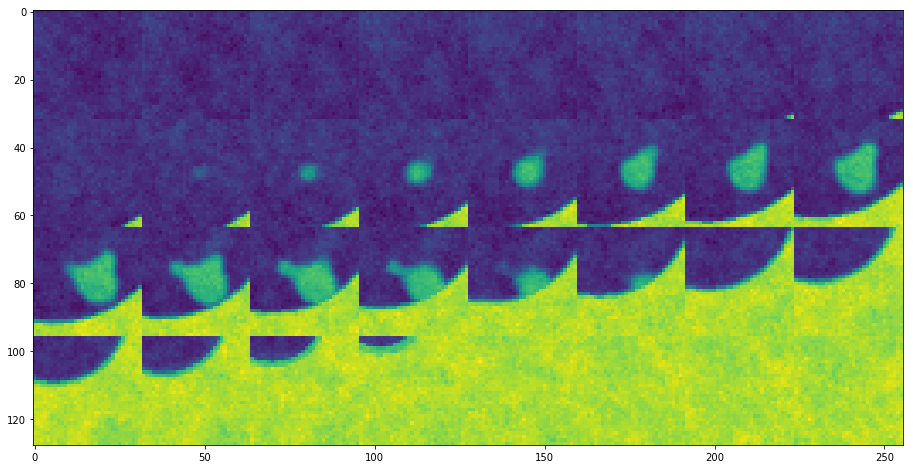

In [213]:
result = make_combo()
figure(figsize=(16,8))
imshow_grid( [ result[x] for x in range(32)] )

In [211]:
%timeit make_combo()

10 loops, best of 3: 58.5 ms per loop
